# **Portfolio Optimization**
**Modern Portfolio Theory**, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

It was formulated by **H. Markowitz** and while it is not the only optimization technique known, it is the most widely used.

MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.

MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

### Add project path to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Import modules

In [2]:
from script.Portfolio_optimization import Optimization
optimizer=Optimization()

### Load Data

In [3]:
forecast_data=optimizer.load_data("data/forecast.csv")

### **Percentage Return**
We take the log of percentage change.The reason for this is that log of the returns is **time additive**.

That is,
If **`r13`** is the returns for time between **`t3`** and **`t1`**.

**`r12`** is the returns between **`t1`** and **`t2`** and

`r23` is the returns between **`t2`** and **`t3`**.

Then, $$ log(r13) = log(r12) + log(r23) $$

In [4]:
pct_return=optimizer.log_pct_return(forecast_data)
pct_return

,TSLA,BND,SPY
Date,,,
2024-10-31,NaN,NaN,NaN
2024-11-01,1.850382e-02,-0.000896,-0.003088
2024-11-02,1.501109e-02,-0.000771,-0.004777
2024-11-03,1.263240e-02,-0.000682,-0.005863
2024-11-04,1.101193e-02,-0.000618,-0.006538
...,...,...,...
2025-10-26,0.000000e+00,-0.000101,-0.002035
2025-10-27,0.000000e+00,-0.000100,-0.002033
2025-10-28,-1.154081e-07,-0.000099,-0.002032


### **Variance**
The variance in prices of stocks are an important indicator of how volatile this investment will be (how returns can fluctuate).
$$
\sigma^2 = \frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N - 1}\\

Where\\
\sigma^2 : \text {is the variance,}\\
𝑁 : \text {is the number of observations,}\\
𝑥_i : \text {is each individual observation,}\\
\bar{x} : \text {is the mean (average) of all observations.}
$$

In [5]:
variance=optimizer.variance(pct_return)
variance

TSLA    4.765268e-06
BND     3.314981e-08
SPY     1.371879e-06
dtype: float64

### **Volatility**
Volatility is a measure of how much a stock's price fluctuates over time. A higher volatility indicates greater price swings, which can be both a risk and an opportunity for investors.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.
$$
s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N - 1}}\\

Where\\
s : \text {is the standard deviation,}\\
𝑁 : \text {is the number of observations,}\\
𝑥_i : \text {is each individual observation,}\\
\bar{x} : \text {is the mean (average) of all observations.}


$$

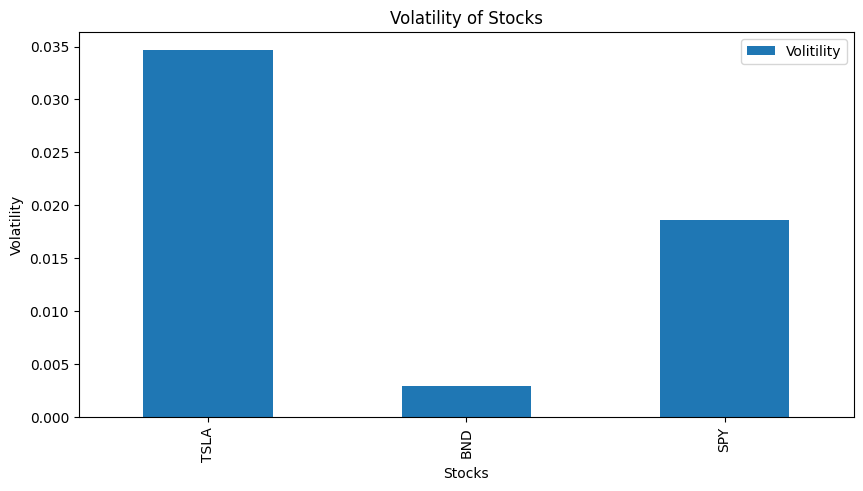

TSLA    0.034653
BND     0.002890
SPY     0.018593
dtype: float64

In [6]:
volatility=optimizer.volitility(forecast_data,variance)
volatility

### **Key Observations from the Chart**:

#### **TSLA:**

**High Volatility**: Tesla exhibits the highest level of volatility among the three stocks. This is consistent with its reputation as a high-growth, high-risk stock.

**Factors Contributing to Volatility**: Tesla's high volatility can be attributed to various factors, including Elon Musk's tweets, product launches, supply chain issues, and overall market sentiment.

#### **BND:**

**Low Volatility**: BND, a bond ETF, shows the lowest level of volatility. This is expected for bond funds, as they are generally considered less volatile than stocks.

**Factors Contributing to Low Volatility**: The relatively stable nature of bond markets and the diversification offered by BND contribute to its low volatility.

#### **SPY:**

**Moderate Volatilit**y: SPY, an S&P 500 index fund, exhibits moderate volatility. This is in line with its role as a broad market index, which is influenced by a variety of economic and geopolitical factors.

#### **Implications for Investors**:

**Risk Tolerance**: Investors should consider their risk tolerance when investing in these stocks. Those with a higher risk tolerance may be more comfortable with the volatility of TSLA, while those with a lower risk tolerance may prefer the stability of BND.

**Diversification**: Diversifying investments across different asset classes can help reduce overall portfolio risk. Including a mix of stocks, bonds, and other asset classes can help balance out volatility.

**Time Horizon**: Investors with a long-term investment horizon may be more willing to tolerate short-term volatility in exchange for potential long-term returns.

It's important to note that past performance is not indicative of future results. Market conditions can change rapidly, and volatility can increase or decrease over time. Therefore, investors should conduct thorough research and consider consulting with a financial advisor before making investment decisions.

### **Covariance**
A covariance matrix is a square matrix that shows the pairwise covariance between different variables. In this case, the variables are the returns of three stocks: TSLA, BND, and SPY.

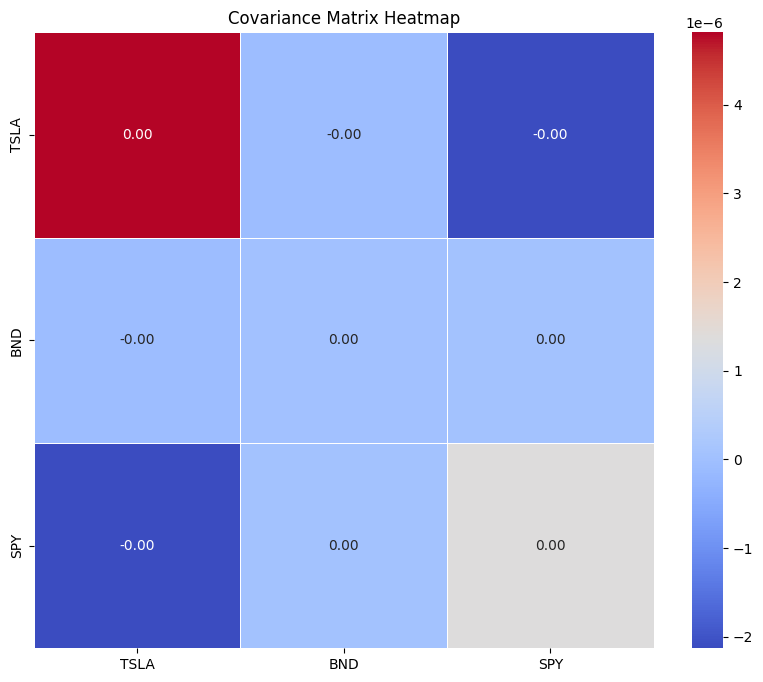

In [ ]:
cov_matrix=optimizer.cov_matrix(forecast_data)

### **Insights from the Heatmap:**

Based on the heatmap, we can observe the following:

#### **TSLA:**

**Low or No Correlation with BND and SPY**: This suggests that Tesla's returns are not strongly influenced by the overall market or bond market movements.

#### **BND:**

**Low or No Correlation with TSLA and SPY:** This indicates that BND's returns are relatively independent of the stock market and Tesla's performance.

#### **SPY:**

**Low or No Correlation with TSLA and BND**: Similar to BND, SPY's returns are not strongly correlated with Tesla or the bond market.

#### **Implications for Portfolio Management:**

**Diversification**: The low correlation between TSLA, BND, and SPY suggests that combining these assets in a portfolio can help reduce overall risk.

**Risk Management**: Investors can use the covariance matrix to assess the impact of different asset allocations on portfolio risk.

**Investment Strategies**: Understanding the relationships between these stocks can inform investment decisions, such as hedging strategies or tactical asset allocation.

### **Correlation**
A correlation matrix is a table showing correlation coefficients between variables. In this case, the variables are the returns of three stocks: TSLA, BND, and SPY.

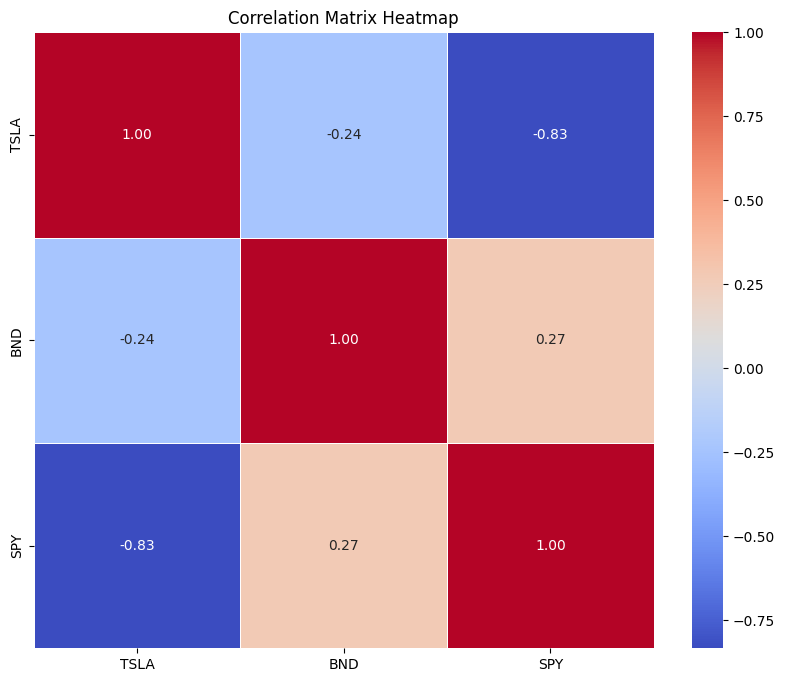

In [8]:
corr_matrix=optimizer.corr_matrix(forecast_data)

### **Insights from the Heatmap:**

#### **TSLA:**

**High Positive Correlation with Itself**: This is expected, as a stock's returns are perfectly correlated with itself.

**Negative Correlation with SPY**: This indicates that Tesla's returns tend to move in the opposite direction of the broader market, which is represented by the SPY.

**Weak Correlation with BND**: This suggests that Tesla's returns are not strongly influenced by bond market movements.

#### **BND:**

**Positive Correlation with SPY**: This indicates that BND tends to move in the same direction as the broader market.
Weak Correlation with TSLA: This suggests that BND's returns are not strongly influenced by Tesla's performance.

#### **SPY:**

**Negative Correlation with TSLA**: This confirms that Tesla's returns tend to move in the opposite direction of the broader market.

**Positive Correlation with BND**: This indicates that SPY and BND tend to move in the same direction, which is expected given that BND tracks a broad bond index.

**Implications for Portfolio Management:**

**Diversification**: The negative correlation between TSLA and SPY suggests that combining these two stocks in a portfolio can help reduce overall risk.

**Risk Management**: Understanding the correlation between different assets can help investors assess portfolio risk and make informed investment decisions.

**Investment Strategies**: Investors can use the correlation information to develop specific investment strategies, such as hedging or momentum trading.

## **Building an optimal risky portfolio**

### **Portfolio Expected Return**
Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques

$$
E(R_p) = \sum_{i=1}^N w_i \cdot E(R_i)\\

Where\\
E(R_p) : \text {is the expected return of the portfolio,}\\
𝑁 : \text {is the number of assets in the portfolio,}\\
w_i : \text {is the weight of asset 𝑖 in the portfolio,}\\
E(R_i) : \text {is the expected return of asset 𝑖.}
$$


### **Annual Expected Return**

In [9]:
ind_er,ann_sd=optimizer.annual_return(forecast_data)

### **Efficient Frontier**
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns. Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

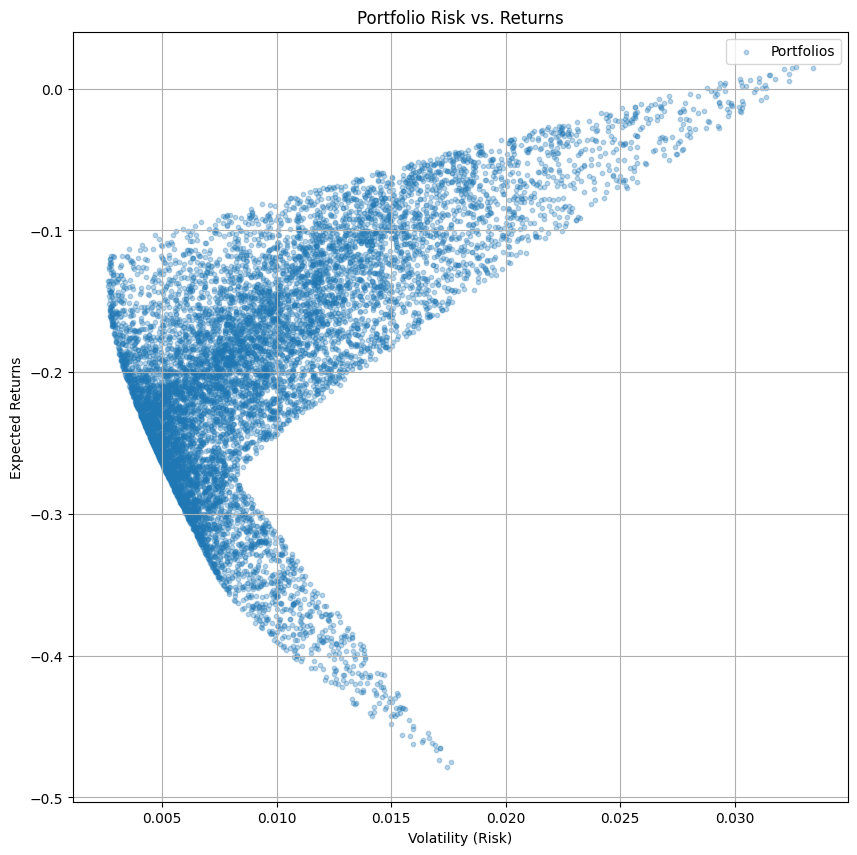

In [10]:
portfolios=optimizer.efficient_frontier_plot(forecast_data,cov_matrix,ind_er,ann_sd)

### **Interpretation**
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

### **Key Takeaways from the Plot:**

1. **Efficient Frontier**: The curve represents the efficient frontier. Any portfolio that lies on this curve is considered efficient, meaning it offers the highest possible return for a given level of risk.
2. **Risk-Return Trade-off**: As you move up the efficient frontier, you generally expect higher returns, but you also take on higher risk. This is the fundamental trade-off in investing.
3. **Diversification**: The efficient frontier demonstrates the benefits of diversification. By combining different assets with low correlations, investors can reduce portfolio risk without sacrificing returns.
4. **Optimal Portfolio**: The optimal portfolio lies on the efficient frontier and represents the best balance of risk and return for a given investor's risk tolerance.

### **Minimum Volatility Portfolio**
A minimum volatility portfolio is a portfolio constructed to minimize risk (volatility) while achieving a certain level of return. It is a specific point on the efficient frontier, representing the portfolio with the lowest possible volatility for a given level of expected return.

Returns       -0.135943
Volatility     0.002649
TSLA weight    0.052120
BND weight     0.889804
SPY weight     0.058076
Name: 6116, dtype: float64

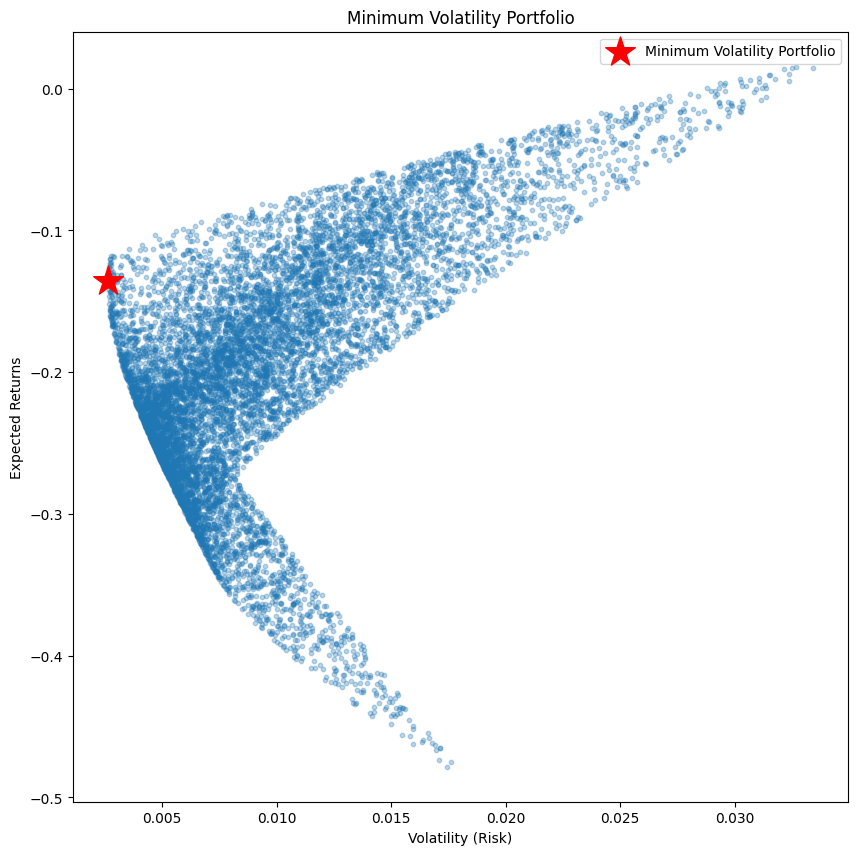

In [11]:
min_vol_port=optimizer.min_vol_port(portfolios)
min_vol_port

### **Key Takeaways:**
- **Risk-Return Trade-off**: The minimum volatility portfolio lies on the efficient frontier, indicating that it offers the best possible risk-return trade-off for its level of risk.
-  **Diversification**: The portfolio's weights (0.052120 for TSLA, 0.889804 for BND, and 0.058076 for SPY) suggest a diversified approach, with a significant allocation to the relatively low-volatility BND.
- **Risk Management**: By investing in the minimum volatility portfolio, investors can reduce the overall risk of their portfolio, especially during periods of market turbulence.

#### **Limitations and Considerations:**
- **Static Analysis**: The minimum volatility portfolio is based on historical data and assumptions about future returns and correlations. Changes in market conditions can impact the portfolio's performance.
- **Transaction Costs**: The frequent rebalancing required to maintain the portfolio's target weights can incur transaction costs, which can erode returns.
- **Risk Tolerance**: The minimum volatility portfolio may not be suitable for all investors. Some investors may prefer higher-risk, higher-return portfolios.

**Conclusion**

The minimum volatility portfolio offers a valuable strategy for investors seeking to minimize risk while still generating returns. By understanding the concept of the efficient frontier and the characteristics of the minimum volatility portfolio, investors can make informed decisions about their investment strategies.


### **Optimal Portfolio**
The optimal risky portfolio is the one with the highest **Sharpe ratio**. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.
The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.
$$
Sharp Ratio= \frac{R_p-R_f}{R_\sigma} \\

Where: \\
R_p: \text{Expected portfolio return} \\
R_f: \text{Risk-free rate of return} \\
R_\sigma: \text{Standard deviation of the portfolio returns}
$$


Returns        0.015559
Volatility     0.032687
TSLA weight    0.948418
BND weight     0.038771
SPY weight     0.012811
Name: 2134, dtype: float64

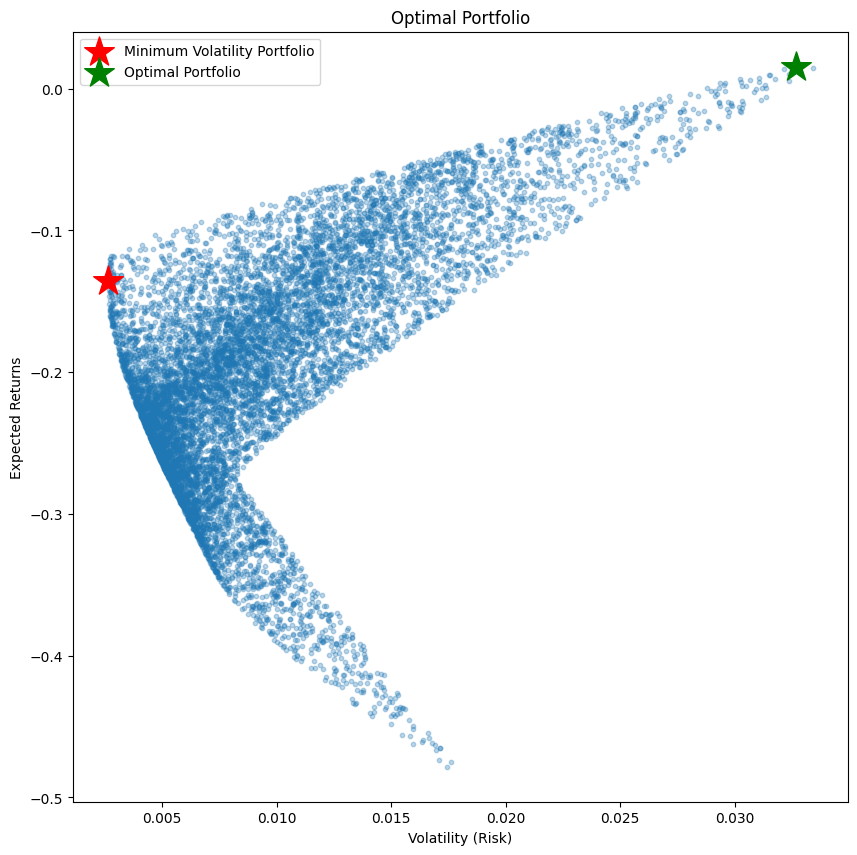

In [12]:
optimal_portfolio=optimizer.optimal_port(portfolios,min_vol_port)
optimal_portfolio

### **Interpreting the Portfolio Weights**
Based on the provided weights:
- **TSLA**: 94.84%
- **BND**: 3.88%
- **SPY**: 1.28%

**We can interpret this as follows:**

- **High Allocation to TSLA**: The significant allocation to Tesla indicates a high-risk, high-reward strategy. The model suggests that Tesla, despite its volatility, has the potential for substantial returns.

- **Moderate Allocation to BND**: A small allocation to BND, a relatively stable bond ETF, can help diversify the portfolio and reduce overall risk.

- **Small Allocation to SPY**: The minimal allocation to SPY, a broad market index fund, suggests that the model prioritizes specific stocks over broad market exposure.

#### **Implications for Investment Strategy**
This optimal portfolio suggests a high-risk, high-reward strategy. It is heavily concentrated in Tesla, which can lead to significant returns if the stock performs well but also exposes the portfolio to significant downside risk.
Investors should carefully consider their risk tolerance before investing in such a concentrated portfolio. It's important to note that past performance is not indicative of future results, and market conditions can change rapidly.

**Additional Considerations:**
- **Rebalancing**: The portfolio may need to be rebalanced periodically to maintain the desired asset allocation, especially if the weights of the individual stocks change significantly.
- **Diversification**: While the portfolio is heavily concentrated in Tesla, adding other assets or diversifying within the equity market can help reduce overall risk.
- **Risk Management**: Implementing stop-loss orders and other risk management strategies can help protect against significant losses.

**Conclusion**

The optimal portfolio identified by the model provides a potential investment strategy that aims to maximize returns while considering risk. However, it's crucial to conduct thorough research and consider individual financial goals and risk tolerance before making investment decisions.
